# Power-law creep envelopes: getting started

Copyright 2022 Marco A. Lopez-Sanchez.  
Content under [Creative Commons Attribution license CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/), code under [Mozilla Public License 2.0](https://www.mozilla.org/en-US/MPL/2.0/).

> **Goal**: Understand flow laws and estimate simple power-law creep envelopes in the continental crust.

In [42]:
# import the required Python scientific libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from types import SimpleNamespace

# set a custom figure style (optional, you can comment the whole block)
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'white'

## Introduction

At depths greater than 10-15 km rocks lie at temperatures and pressures high enough to flow under shear stresses without losing coherence (i.e. without fracturing). To describe and predict how rocks deform under such conditions, earth scientists typically use mathematical equations that relate stress to strain rate. We called such relationship **flow law**, _deformation law_, or, if it refers to a specific material, a *constitutive equation*, where _constitutive_ refers to the constitution of the material.

> Under conditions of temperature approximately above half their melting temperature $>0.5T_m$, polycrystalline monomineralic rocks (e.g. quartzite, ice or salt) flow under shear stress as long as the shear stress is above a threshold value called the [yield stress](https://en.wikipedia.org/wiki/Yield_(engineering)). Below that limit, rocks undergo elastic deformation (recoverable once the differential stress is removed). Above this limit, the deformation produced will be irreversible. This behaviour is generally referred to as [plasticity](https://en.wikipedia.org/wiki/Plasticity_(physics)) or (visco)plastic deformation. For further information on rheological nomenclature see [here](http://dx.doi.org/10.31223/X5Z92Z). The two most important features of (visco)plastic deformation are that **once the yield stress is exceeded** the final deformation depends mainly on time and temperature (which strongly affects strain rates). It is therefore said that (visco)plasticity is a process with a strong dependence on time and temperature.

## Step 1: The power-law creep approximation

> **Unfinished!**

Rock and single-crystal deformation experiments show that at low to moderate shear stresses (<200 MPa), those expected to operate in the aseismic (ductile) lithosphere, the relationship between differential stress and strain rate fits a power-law relationship referred to as the _power-law creep_, i.e. that strain rate ($\dot{\epsilon}$) is proportional to the differential stress ($\sigma_d$) raised to a number, named the stress exponent ($n$), as follows

$$
\dot{\epsilon} \propto \sigma^n_d
$$

TODO -> show a figure of how the power law relationships look like and the effect of the value of n


Text(0, 0.5, '$\\sigma_{diff}$')

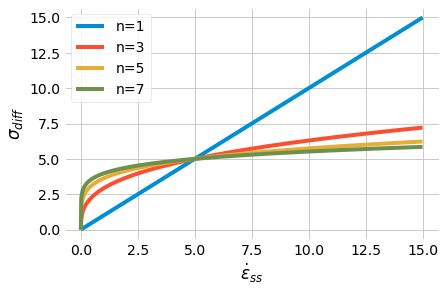

In [43]:
stress = np.linspace(0, 15, 1000)

# estimate corresponding strain rates using: ss = C * stress**n 
x1 = 10 / 5**1 * stress**1
x3 = 10 / 5**3 * stress**3
x5 = 10 / 5**5 * stress**5
x7 = 10 / 5**7 * stress**7

fig, ax = plt.subplots()

ax.plot(stress, y1, label='n=1')
ax.plot(stress, y3, label='n=3')
ax.plot(stress, y5, label='n=5')
ax.plot(stress, y7, label='n=7')

ax.legend()
ax.set_xlabel('$\dot{\epsilon}_{ss}$')
ax.set_ylabel('$\sigma_{diff}$')


Most rock types in the laboratory provide values of $n$ between 3 and 5.

TODO -> explain the meaning of the different stress values!!

As previously mentioned, when a material deforms (visco)plastically, there is a strong dependence on the temperature. This dependence is normally implemented by adding the Arrhenius model to this relationship between the differential stress and the strain rate as follows

$$
\dot{\epsilon} = \sigma^n_d A \space exp \left( \frac{E}{RT} \right)
$$
  
where $A \space exp(E/RT)$ is the Arrhenius equation. TODO -> show how the T values affects the strain rate by fixing the other variables

...being the higher the temperature the higher the strain rate for similar differential stress. All other variables in the Arrhenius equation excepting $R$ are intrinsic to the material itself (see box below for details).


> 👉 The [Arrhenius equation](https://en.wikipedia.org/wiki/Arrhenius_equation) is a formula proposed by [Svante Arrhenius](https://en.wikipedia.org/wiki/Svante_Arrhenius) to model reaction rates, i.e. the frequency of events per second that result in a reaction. This equation, however, is used in a general way for modelling any process involving rates and dependence on temperature such as viscosity in fluids or plasticity in solids. In our case, it will account for the frequency of events that lead to a permanent crystal lattice deformation. The equation consists of two main parts, the _pre-exponential factor_ $(A)$ which in a chemical reaction accounts for the number of events per second leading to or not to a reaction (in our case leading to or not to a permanent crystal lattice deformation), and the _exponential factor_ $exp(E/RT)$ that accounts for the probability that any given event will result in a chemical reaction (or permanent crystal lattice deformation). The _exponential factor_ includes the _activation energy_ $(E)$ needed for process being modelled to occur in $J mol^{-1}$, the _universal gas constant_ $(R)$ in $J mol^{-1} K^{-1}$, and the _absolute temperature_ $(T)$ in kelvins. The _pre-exponential factor_ $(A)$ and the _activation energy_ $(E)$ are both material-specific variables and are estimated in the laboratory for different types of rock.

TODO: At these conditions, rock samples typically develop dynamic recrystallization and crystallographic preferred orientation (CPO), both typical features of a deformation controlled by the movement of dislocations known as [dislocation creep](https://en.wikipedia.org/wiki/Dislocation_creep). This observation is in excellent agreement with what is observed in nature, where the most typical feature in natural ductile shear zones at depths below 10-15 km is the presence of fine-grained rocks known as [mylonites](https://en.wikipedia.org/wiki/Mylonite) characterized by these very same microstructures. Hence, geophysicists usually use power-law equations with $n$ values typical of the dislocation creep to model the deformation of the non-frictional part of the lithosphere, a fairly reliable first approximation since most of the deformation in the lithosphere is accommodated through [crustal-scale shear zones](https://doi.org/10.1016/j.tecto.2012.06.006).

> 👉 The creep of rocks also shows dependence on other variables such as grain size, pressure or water/melt content. For the sake of simplicity, we will omit these variables for now to define our flow law, in more advanced tutorials we will see how they affect rock flow and how we can introduce them in our flow law.

Most of the time, we want to obtain the minimum differential stress required to deform a rock at a given strain rate. This is because usually what we can measure in nature is the strain rate (e.g. via GPS or the rock record and geochronology). If we clear the differential stress we get

$$
\sigma_d = \dot{\epsilon}^{(1/n)} A^{-1/n} \space exp \left( \frac{E}{nRT} \right)
$$

this is the equation that we will implement next to estimate our first crustal strength envelope.

In [44]:
def power_law_creep(strain_rate, n, A, E, T):
    """ Return the necessary differential stress (Tresca criterion) in
    MPa for permanently deforming a polycrystalline material at a given
    strain rate and environmental conditions (only considering T). This
    is a simplified flow law that ignores the effect of any variable other
    than temperature and material-related constants.

    Parameters (scalars and/or arrays, all positive values)
    ----------
    strain_rate : strain rate [s**-1]........scalar or array
    n : stress exponent......................scalar
    A : material constant [MPa**-n s**-1]....scalar
    E : activation energy [J mol**-1]........scalar
    T : absolute temperature [K].............scalar or array

    Assumptions
    -----------
    - Steady-state creep
    - Low to moderate stress regime (< 200 MPa)
    - The effect of pressure, grain size, water content, and
    partial melt is ignored
    """
    # set universal gas constant [J mol**-1 K**-1]
    R = 8.3144626 
    
    return (strain_rate * np.exp(E / (R * T)) / A)**(1 / n)

## Step 2: Estimate and plot a power-law creep envelope for the crust

The first step is to load some Python functions contained in the script folder using the ``%run`` command. These will be used later to build the power-law creep envelopes.

In [45]:
# flow_laws_params.py contains the experimental estimates of the different parameters of the power-law creep equation
%run scripts/flow_laws_params.py

# thermal_functions contains the functions required to estimate a stable geotherm. See the "stable geotherm" notebook for details.
%run scripts/thermal_functions.py

functions loaded from 'flow_laws_params.py': 
 quartz,
 olivine, 
 olivine_Idrissi 

funtions loaded from 'thermal_functions.py': 
 turcotte_schubert_model 
 thermal_conductivity


Set some parameters of the model

In [46]:
moho = 38.8      # Continental crust thickness [m], average from Hacker et al. (2015)
T0 = 7.5         # surface temperature (taken from the KTB superdeep borehole)
ro_crust = 2750  # average rock density in the crust [kg/m**3]
g = 9.80665      # average gravitational acceleration [m/s**2]

# Set the average heat parameters for the crust.
# We will store the different parameters within an object called heat_crust
heat_crust = SimpleNamespace(Jq=65,  A=0.97, K=2.51)

Now, let's create an array with the depths and estimate the corresponding temperatures (a.k.a the geotherm) using the Turcote and Schubert model

In [47]:
# generate a linear spaced array of depths every 10 m
depths = np.linspace(start=0, stop=moho, num=3880)

# call the "turcotte_schubert_model" and pass the different arguments in order
T_crust = turcotte_schubert_model(depths, thermal=(T0, heat_crust.Jq, heat_crust.A, heat_crust.K))

# create a pandas dataframe (tabular-like data)
dataset = pd.DataFrame({'depths_km': depths,
                        'Tmodel1_C': T_crust})
dataset.round(2)

,depths_km,Tmodel1_C
0,0.00,7.50
1,0.01,7.76
2,0.02,8.02
3,0.03,8.28
4,0.04,8.54
...,...,...
3875,38.76,720.95
3876,38.77,721.06
3877,38.78,721.17
3878,38.79,721.28


In [48]:
# estimate the pressure gradient (assuming constant density in the crust)
dataset['pressure_MPa'] = (ro_crust * g * dataset['depths_km']) / 1e3  # /1e3 to obtain MPa
dataset.round(2)

,depths_km,Tmodel1_C,pressure_MPa
0,0.00,7.50,0.00
1,0.01,7.76,0.27
2,0.02,8.02,0.54
3,0.03,8.28,0.81
4,0.04,8.54,1.08
...,...,...,...
3875,38.76,720.95,1045.29
3876,38.77,721.06,1045.56
3877,38.78,721.17,1045.83
3878,38.79,721.28,1046.10


In the continental crust, it is considered as a first approximation that quartz controls deformation. Partly because it is one of the dominant mineral phases along with feldspars but is much less resistant than feldspars under similar conditions. So to simplify things once again let's use the experimental values of quartz deformation to model the strength of the continental crust. Let see which flow laws parameters are available within the quartz function

In [49]:
quartz()

Available flow laws:
'HTD' from Hirth et al. (2004)
'LP_wet' from Luan and Paterson (1992)
'GT_wet' from Gleason and Tullis (1995)
'HK_wet' from Holyoke and Kronenberg (2010)
'RB_wet' from Rutter and Brodie (2004)


Here, we will use the Hirth et al. (2004) and the Gleason and Tullis (1995) flow laws for comparison. The function ``quartz()`` returns the stress exponent ($n$), the activation energy ($E$) in $J mol^{-1}$, and the material constant ($A$) in $MPa^{-n} s^{-1}$ of the available flow laws.

In [50]:
Hirth = quartz('HTD')
Gleason = quartz('GT_wet')

# check that we obtained the three values
Gleason

namespace(n=4.0, E=223000, A=0.00011, ref='Gleason and Tullis (1995)')

estimate the differential stress at steady-state using 1.0e-14 $s^{-1}$ as the reference average shear strain rate in the ductile lithosphere.

In [51]:
dataset['model_HTD'] = power_law_creep(strain_rate=1e-14,
                                       n=Hirth.n,
                                       A=Hirth.A,
                                       E=Hirth.E,
                                       T=dataset['Tmodel1_C'] + 273.15,  # convert C to K
                                      )

dataset['model_GT'] = power_law_creep(strain_rate=1e-14,
                                      n=Gleason.n,
                                      A=Gleason.A,
                                      E=Gleason.E,
                                      T=dataset['Tmodel1_C'] + 273.15,
                                      )

dataset.round(2)

,depths_km,Tmodel1_C,pressure_MPa,model_HTD,model_GT
0,0.00,7.50,0.00,381447.54,73392481.57
1,0.01,7.76,0.27,376394.30,71793380.53
2,0.02,8.02,0.54,371417.86,70232202.00
3,0.03,8.28,0.81,366516.93,68707976.92
4,0.04,8.54,1.08,361690.21,67219762.71
...,...,...,...,...,...
3875,38.76,720.95,1045.29,11.84,2.62
3876,38.77,721.06,1045.56,11.83,2.62
3877,38.78,721.17,1045.83,11.83,2.62
3878,38.79,721.28,1046.10,11.82,2.62


Lastly, we are going to plot the "Goetze criterion" to use as a reference for the brittle field in our figure. The _Goetze criterion_, suggested by C. Goetze based on Edmond and Paterson's (1972) data, defines the condition at which the differential stress needed to produce plastic flow (i.e. the yield stress) becomes higher than the confining pressure and thus high enough for crack nucleation.
$$
\sigma_{1} - \sigma_{3} = P = \rho g h
$$

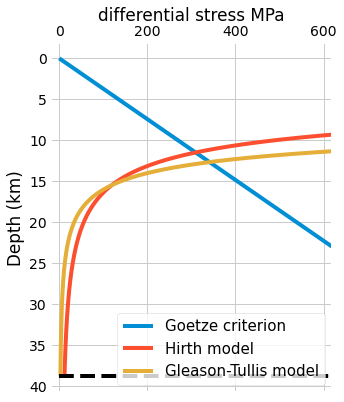

In [52]:
# plot the geotherm for the entire lithosphere
fig1, ax = plt.subplots(figsize=(4.5, 6))

# tweak the figure axe so that the depth is shown on the y-axis downwards
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# plot the strength envelopes
ax.plot(dataset['pressure_MPa'], dataset['depths_km'], label='Goetze criterion')
ax.plot(dataset['model_HTD'], dataset['depths_km'], label='Hirth model')
ax.plot(dataset['model_GT'], dataset['depths_km'], label='Gleason-Tullis model')
ax.plot([0, 1100], [moho, moho], color='black', linestyle='dashed')

ax.set(xlabel='differential stress MPa', ylabel='Depth (km)')
ax.set_xlim(left=-20, right=620)
_ = ax.legend(loc='lower right', fontsize=15)

From this figure we can see that:

- The frictional-plastic transition in the continental crust is located at a depth of between 12 and 14 km (assuming that our model of stable geotherm and the deformation rate are realistic).
- For plastic flow deformation of quartz-rich rocks right at the frictional-plastic transition, a differential stress of about 300 MPa is required. 
- Using the same parameters, Hirth et al.'s model produces shallower frictional-plastic transitions and requires slightly lower differential stress values than Gleason & Tullis' model in this transition. On the other hand, the Gleason & Tullis' model predicts a less resistant lower crust.

In the following notebooks, we will test more models and different parameters, include the lithospheric mantle, and discuss how realistic the predictions are.

In [53]:
import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Matplotlib', mpl.__version__)
print('Pandas', pd.__version__)

Notebook tested in 2022-06-02 using:
Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Numpy 1.22.3
Matplotlib 3.5.1
Pandas 1.4.2
